# Bài tập lập trình: Tiền xử lý dữ liệu

```
ProtonX - TensorFlow Class 
```

### Hướng dẫn làm bài 
- Trong bài tập này bạn sẽ sử dụng Python 3.
- Sau khi bạn viết Code của mình xong, hãy chạy dòng Code đó để xem kết quả bên dưới. 

### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**
- **Không thay đổi dòng code return của hàm**

Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO: Lập trình tại đây` và thay thế các vị trí `None`. Có những câu hỏi chỉ cần trả về đáp án.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó. 

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Các bài tập sẽ được chấm dựa trên các Test-case.
* Các bạn không khởi tạo lại giá trị đầu vào bên trong hàm. Có thể khởi tạo các giá trị này ngoài hàm nhằm mục đích kiểm thử.

In [44]:
!pip install tensorflow_data_validation

## 0. Cài đặt các thư viện cần thiết

In [45]:
import pandas as pd
import tensorflow as tf
import tensorflow_data_validation as tfdv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

## 1. Tải dữ liệu

In [46]:
!wget https://storage.googleapis.com/protonx-cloud-storage/datasets/credit_risk/train.csv
!wget https://storage.googleapis.com/protonx-cloud-storage/datasets/credit_risk/validation.csv


--2022-09-30 17:20:05--  https://storage.googleapis.com/protonx-cloud-storage/datasets/credit_risk/train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [application/octet-stream]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  37.12K  --.-KB/s    in 0s      

2022-09-30 17:20:05 (136 MB/s) - ‘train.csv.1’ saved [38013/38013]

--2022-09-30 17:20:05--  https://storage.googleapis.com/protonx-cloud-storage/datasets/credit_risk/validation.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22699 (22K) [application/octet-st

## 2. Đọc dữ liệu

Đây là bộ dữ liệu cho vay, bao gồm những thuộc tính quyết định một tổ chức có nên cho một cá nhân vay tín dụng hay không. 

**a. Các đặc trưng để quyết định (Loại trừ đặc trưng Loan_ID)**
- Gender (Giới tính)
  - Dạng: Chuỗi
  - Đặc trưng loại: `Male` hoặc `Female`
- Married (Tình trạng hôn nhân)
  - Dạng: Chuỗi
  - Đặc trưng loại: `Yes` hoặc `No`
- Dependents (Số lượng người phụ thuộc trong gia đình)
  - Dạng: Chuỗi
  - Đặc trưng loại: `0` hoặc `1` hoặc `2` hoặc `3+`
- Education (Học vấn)
  - Dạng: Chuỗi
  - Đặc trưng loại: `Graduate` hoặc `Not Graduate`
- Self_Employed (Có tự làm chủ không)
  - Dạng: Chuỗi
  - Đặc trưng loại: `Yes` hoặc `No`  
- ApplicantIncome (Thu nhập người vay)
  - Dạng: Số 
  - Đặc trưng số liên tục
- CoapplicantIncome (Thu nhập người cùng đi vay)
  - Dạng: Số 
  - Đặc trưng số liên tục
- LoanAmount (Số tiền vay)
  - Dạng: Số 
  - Đặc trưng số liên tục
- Loan_Amount_Term (Kỳ hạn)
  - Dạng: Số 
  - Đặc trưng số liên tục
- Property_Area (Vị trí tài sản)
  - Dạng: Chuỗi
  - Đặc trưng loại: `Semiurban`, `Urban`, `Rural`
- Credit_History (Lịch sử vay)
  - Dạng: Số
  - Đặc trưng số rời rạc: `1.0` hoặc `0.0`

**b. Nhãn: Khả năng có nên cho vay hay không?**
- Với file `train.cvs`
  - Nhãn sử dụng dưới tên cột: `Loan_Status`
- Với file `validation.cvs`
  - Nhãn sử dụng dưới tên cột: `outcome`

In [47]:
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('validation.csv')

Hiển thị dữ liệu của tập train và validation

In [48]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
val_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


Hiển thị các giá trị của loại trong một cột bất kỳ

In [50]:
train_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## 3. Hiển thị thống kê của dữ liệu

Chúng ta sẽ sử dụng thư viện `tensorflow_data_validation` để trích xuất thông tin thống kê của dữ liệu và hiển thị thông tin.

In [51]:
def display_stats(df):
  test_stats = tfdv.generate_statistics_from_dataframe(train_df)
  tfdv.visualize_statistics(test_stats)

Hiển thị thống kê của dữ liệu train

In [52]:
display_stats(train_df)

Hiển thị thống kê của dữ liệu validation

## 4. Đổi tên cột nhãn của bộ validation.
Đổi tên từ `outcome` thành `Loan_Status`

In [53]:
val_df = val_df.rename(columns={'outcome': 'Loan_Status'})

Kiểm tra việc đổi tên

In [54]:
'Loan_Status' in val_df.columns and 'outcome' not in val_df.columns 

True

## 5. Kiểm tra các cột bị thiếu giá trị

Những cột thiếu giá trị trong tập train: 
- Đặc trưng loại: `Gender`, `Married`, `Dependents`, `Self_Employed`
- Đặc trưng số liên tục: `LoanAmount`, `Loan_Amount_Term`
- Đặc trưng số rời rạc: `Credit_History`

In [55]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Những cột thiếu giá trị trong tập validation: 
- Đặc trưng loại: `Gender`, `Dependents`, `Self_Employed`
- Đặc trưng số liên tục: `LoanAmount`, `Loan_Amount_Term`
- Đặc trưng số rời rạc: `Credit_History`

In [56]:
val_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

## 6. Xử lý dữ liệu bị thiếu (missing values)

Trong bài này ta sử dụng một cách đơn giản để bổ sung các giá trị bị thiếu. Với 
- Đặc trưng loại: Bổ sung giá trị bị thiếu bằng giá trị xuất hiện nhiều nhất trong cột 
- Đặc trưng số liên tục: Bổ sung giá trị bị thiếu bằng giá trị trung bình (mean) của các giá trị trong cột
- Đặc trưng số rời rạc: Bổ sung giá trị bị thiếu bằng giá trị xuất hiện nhiều nhất trong cột 

**Chú ý:** Việc đổ đầy các giá trị thông qua giá trị nhiều nhất cũng như trung bình sẽ ảnh hưởng đến phân phối dữ liệu, nên trong phân tích việc này chỉ hiệu quả khi nguyên nhân thiếu hụt là `MCAR` (Missing Completely At Random) do một sự kiện đặc biệt nào đó và hoàn toàn không liên quan tới đặc trưng hiện tại cũng như các đặc trưng khác trong bộ dữ liệu.

Chi tiết về thiếu dữ liệu - các nguyên nhân và giải pháp sẽ được đề cập chi tiết trong một buổi học của ProtonX.

### 6.1 Xử lý đặc trưng loại bị thiếu.
Bổ sung giá trị bị thiếu bằng giá trị xuất hiện nhiều nhất trong cột

Ví dụ cột `Gender` ta đổ đầy các giá trị thiếu bằng giá trị xuất hiện nhiều nhất. 

Hàm kiểm tra giá trị xuất hiện nhiều nhất

In [57]:
most_frequent_gender = train_df['Gender'].mode()[0]
most_frequent_gender

'Male'

Sử dụng hàm `fillna` để đổ đầy các giá trị thiếu bằng giá trị này

In [58]:
train_df['Gender'] = train_df['Gender'].fillna(most_frequent_gender)

Kiểm tra lại cột `Gender` còn giá trị thiếu hay không?

In [59]:
train_df['Gender'].isna().sum()

0

```TODO 1:``` Đóng gói một hàm có khả năng đổ đầy thông tin cho đặc trưng loại bằng giá trị xuất hiện nhiều nhất trong cột 

In [60]:
def fill_categorical_features(df, column_name):
  """
  Đầu vào:
    - df: 
      - Dạng: Pandas DataFrame. 
      - Ví dụ: train_df, val_df, test_df
    - column_name: 
      - Miêu tả: Tên cột đặc trưng loại muốn đổ đầy các giá trị thiếu bằng giá trị xuất hiện nhiều nhất trong cột
      - Điều kiện: len(column_name) > 0
      - Ví dụ: 'Gender'
  Đầu ra:
    - Trả về Dataframe đã được đổ đầy thông tin trong cột
  """
  # Lập trình tại đây
  
  # Tìm ra giá trị xuất hiện nhiều nhất trong cột
  most_frequent_value = df[column_name].mode()[0]

  df[column_name] = df[column_name].fillna(most_frequent_value)

  return df

```TODO 2```: Thực hiện hàm này trên các cột thiếu của tập train: `Gender`, `Married`, `Dependents`, `Self_Employed`

In [61]:
train_df = fill_categorical_features(train_df, 'Gender')
train_df = fill_categorical_features(train_df, 'Married')
train_df = fill_categorical_features(train_df, 'Dependents')
train_df = fill_categorical_features(train_df, 'Self_Employed')

In [62]:
# TEST CODE
columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in columns:
  print("Số lượng còn thiếu ở cột {} là: {}".format(col, train_df[col].isna().sum()))
  print("Số lượng các giá trị hiện tại của cột {} là".format(col, ))
  print(train_df[col].value_counts())
  print('----------------------------------------------------')

Số lượng còn thiếu ở cột Gender là: 0
Số lượng các giá trị hiện tại của cột Gender là
Male      502
Female    112
Name: Gender, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Married là: 0
Số lượng các giá trị hiện tại của cột Married là
Yes    401
No     213
Name: Married, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Dependents là: 0
Số lượng các giá trị hiện tại của cột Dependents là
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Self_Employed là: 0
Số lượng các giá trị hiện tại của cột Self_Employed là
No     532
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------------------------


**Kết quả mong đợi:**

```
Số lượng còn thiếu ở cột Gender là: 0
Số lượng các giá trị hiện tại của cột Gender là
Male      502
Female    112
Name: Gender, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Married là: 0
Số lượng các giá trị hiện tại của cột Married là
Yes    401
No     213
Name: Married, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Dependents là: 0
Số lượng các giá trị hiện tại của cột Dependents là
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Self_Employed là: 0
Số lượng các giá trị hiện tại của cột Self_Employed là
No     532
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------------------------
```

```TODO 3```: Thực hiện hàm này trên các cột thiếu của tập validation: `Gender`, `Dependents`, `Self_Employed`

In [63]:
# Lập trình tại đây
val_df = fill_categorical_features(val_df, 'Gender')
val_df = fill_categorical_features(val_df, 'Dependents')
val_df = fill_categorical_features(val_df, 'Self_Employed')

In [64]:
# TEST CODE
columns = ['Gender', 'Dependents', 'Self_Employed']
for col in columns:
  print("Số lượng còn thiếu ở cột {} là: {}".format(col, val_df[col].isna().sum()))
  print("Số lượng các giá trị hiện tại của cột {} là".format(col, ))
  print(val_df[col].value_counts())
  print('----------------------------------------------------')

Số lượng còn thiếu ở cột Gender là: 0
Số lượng các giá trị hiện tại của cột Gender là
Male      297
Female     70
Name: Gender, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Dependents là: 0
Số lượng các giá trị hiện tại của cột Dependents là
0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Self_Employed là: 0
Số lượng các giá trị hiện tại của cột Self_Employed là
No     330
Yes     37
Name: Self_Employed, dtype: int64
----------------------------------------------------


**Kết quả mong đợi:**

```
Số lượng còn thiếu ở cột Gender là: 0
Số lượng các giá trị hiện tại của cột Gender là
Male      297
Female     70
Name: Gender, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Dependents là: 0
Số lượng các giá trị hiện tại của cột Dependents là
0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64
----------------------------------------------------
Số lượng còn thiếu ở cột Self_Employed là: 0
Số lượng các giá trị hiện tại của cột Self_Employed là
No     330
Yes     37
Name: Self_Employed, dtype: int64
----------------------------------------------------
```

### 6.2 Xử lý đặc trưng số liên tục bị thiếu.
Bổ sung giá trị bị thiếu bằng giá trị trung bình (mean) của các giá trị trong cột

Ví dụ cột `LoanAmount` ta đổ đầy các giá trị thiếu bằng giá trị trung bình (mean) của các giá trị trong cột này

Hàm tìm giá trị trung bình trong một cột

In [65]:
mean_loan_amount = train_df['LoanAmount'].mean()
mean_loan_amount

146.41216216216216

Sử dụng hàm `fillna` để đổ đầy các giá trị thiếu bằng giá trị này

In [66]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(mean_loan_amount)

Kiểm tra lại cột `LoanAmount` còn giá trị thiếu hay không?

In [67]:
train_df['LoanAmount'].isna().sum()

0

```TODO 4:``` Đóng gói một hàm có khả năng đổ đầy thông tin cho đặc trưng số liên tục bằng giá trị trung bình trong cột 

In [68]:
def fill_continuous_numerical_features(df, column_name):
  """
  Đầu vào:
    - df: 
      - Dạng: Pandas DataFrame. 
      - Ví dụ: train_df, val_df, test_df
    - column_name: 
      - Miêu tả: Tên cột đặc trưng loại muốn đổ đầy các giá trị thiếu bằng bằng giá trị trung bình trong cột
      - Điều kiện: len(column_name) > 0
      - Ví dụ: 'LoanAmount'
  Đầu ra:
    - Trả về Dataframe đã được đổ đầy thông tin trong cột
  """
  # Lập trình tại đây
  
  # Tìm ra giá trị trung bình trong cột
  mean_value = train_df[column_name].mean()

  df[column_name] = df[column_name].fillna(mean_value)

  return df

```TODO 5```: Thực hiện hàm này trên các cột thiếu của tập train: `LoanAmount`, `Loan_Amount_Term`

In [69]:
# Lập trình tại đây
train_df = fill_continuous_numerical_features(train_df, 'LoanAmount')
train_df = fill_continuous_numerical_features(train_df, 'Loan_Amount_Term')

In [70]:
# TEST CODE
columns = ['LoanAmount', 'Loan_Amount_Term']
for col in columns:
  print("Số lượng còn thiếu ở cột {} là: {}".format(col, train_df[col].isna().sum()))
  print("Giá trị trung bình mới: {}".format(train_df[col].mean()))
  print('----------------------------------------------------')

Số lượng còn thiếu ở cột LoanAmount là: 0
Giá trị trung bình mới: 146.41216216216216
----------------------------------------------------
Số lượng còn thiếu ở cột Loan_Amount_Term là: 0
Giá trị trung bình mới: 342.0
----------------------------------------------------


**Kết quả mong đợi:**

```
Số lượng còn thiếu ở cột LoanAmount là: 0
Giá trị trung bình mới: 146.41216216216213
----------------------------------------------------
Số lượng còn thiếu ở cột Loan_Amount_Term là: 0
Giá trị trung bình mới: 342.0
----------------------------------------------------
```

```TODO 6```: Thực hiện hàm này trên các cột thiếu của tập validation: `LoanAmount`, `Loan_Amount_Term`

In [71]:
# Lập trình tại đây
val_df = fill_continuous_numerical_features(val_df, 'LoanAmount')
val_df = fill_continuous_numerical_features(val_df, 'Loan_Amount_Term')

In [72]:
# TEST CODE
columns = ['LoanAmount', 'Loan_Amount_Term']
for col in columns:
  print("Số lượng còn thiếu ở cột {} là: {}".format(col, val_df[col].isna().sum()))
  print("Giá trị trung bình mới: {}".format(val_df[col].mean()))
  print('----------------------------------------------------')

Số lượng còn thiếu ở cột LoanAmount là: 0
Giá trị trung bình mới: 136.2726452610649
----------------------------------------------------
Số lượng còn thiếu ở cột Loan_Amount_Term là: 0
Giá trị trung bình mới: 342.5286103542234
----------------------------------------------------


**Kết quả mong đợi:**

```
Số lượng còn thiếu ở cột LoanAmount là: 0
Giá trị trung bình mới: 136.27264526106487
----------------------------------------------------
Số lượng còn thiếu ở cột Loan_Amount_Term là: 0
Giá trị trung bình mới: 342.5286103542234
----------------------------------------------------
```

### 6.3 Xử lý đặc trưng số rời rạc bị thiếu.
Bổ sung giá trị bị thiếu bằng giá trị xuất hiện nhiều nhất trong cột. Ta có thể sử dụng lại hàm ```fill_categorical_features``` cho đặc trưng này

Thực hiện hàm này trên cột thiếu của tập train: `Credit_History`

In [73]:
train_df = fill_categorical_features(train_df, 'Credit_History')

Thực hiện hàm này trên cột thiếu của tập validation: `Credit_History`

In [74]:
val_df = fill_categorical_features(val_df, 'Credit_History')

## 7. Chuẩn hóa các cột

### 7.1 Viết hàm chuẩn hóa

Hàm chuẩn hóa này sẽ có thể chuẩn hóa dữ liệu theo phân phối chuẩn hoặc sử dụng minmax scale

In [75]:
def scaling(df, scaler, column_names, mode='train'):
  """
  Đầu vào:
    - df: 
      - Dạng: Pandas DataFrame. 
      - Ví dụ: train_df, val_df, test_df
    - scaler: 
      - Dạng: đối tượng được tạo bởi Scaler bởi sklearn. 
      - Ví dụ: StandardScaler() hoặc MinMaxScaler()
    - column_names: 
      - Dạng: mảng Python chứa tên các cột muốn chuẩn hóa. 
      - Ví dụ: ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
      - Điều kiện: len(column_names) > 0
    - mode: Chế độ chuẩn hóa
      - Dạng: chuỗi Python
      - Ví dụ: một trong 3 giá trị {'train', 'val', 'test'}
  Đầu ra:
    - Trả về Dataframe đã được chuẩn hóa
  """
  # Nếu mode không hợp lệ thì báo lỗi
  assert mode in ['train', 'val', 'test'], 'Mode chỉ có thể nhận 3 giá trị nằm trong {train, val, test}'
  
  # Truy xuất các cột
  x = df[column_names].values

  # Nếu chế độ train thì tìm các thông số của phân phối và chuẩn hóa
  if mode == 'train':
    x_scaled = scaler.fit_transform(x)
  
  # Nếu chế độ là val hoặc test thì dùng các tham số để chuẩn hóa
  else:
    x_scaled = scaler.transform(x)

  # Tạo dataframe con cho các dữ liệu đã được chuẩn hóa
  normalized_features = pd.DataFrame(x_scaled, columns=column_names, index = df.index)
    
  # Gán lại dataframe con này cho dataframe lớn ban đầu
  df[column_names] = normalized_features

  return df


### 7.2 Chuẩn hóa cho tập train

Thực hiện chuẩn hóa theo min max cho 4 cột `LoanAmount`, `ApplicantIncome`, `CoapplicantIncome`, `Loan_Amount_Term` của tập train

In [76]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

column_names_to_normalize =  ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
train_df = scaling(train_df, min_max_scaler, column_names_to_normalize, mode='train')

Hiện thị các phân phối này

In [77]:
def display_distribution(df, features):
  plt.figure(figsize=(12,28*4))
  gs = gridspec.GridSpec(28, 1)
  for i, cn in enumerate(features):
      ax = plt.subplot(gs[i])
      sns.distplot(df[cn][df.Loan_Status == 'Y'], bins=50)
      sns.distplot(df[cn][df.Loan_Status == 'N'], bins=50)
      ax.set_xlabel('')
      ax.set_title('histogram of feature: ' + str(cn))
  plt.show()

Bạn có thể thắc mắc tại sao lại không sử dụng chuẩn hóa về phân phối chuẩn đơn vị (StandardScaler) thì trong trường hợp này các giá trị ví dụ `LoanAmount` đều là số dương cho nên chúng ta sẽ không ưu tiên sử dụng phân phối này - phân phối này tạo ra những `giá trị âm` bên trái trung bình 0. Có thể dùng phân phối `LogNormal` để thay thế.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

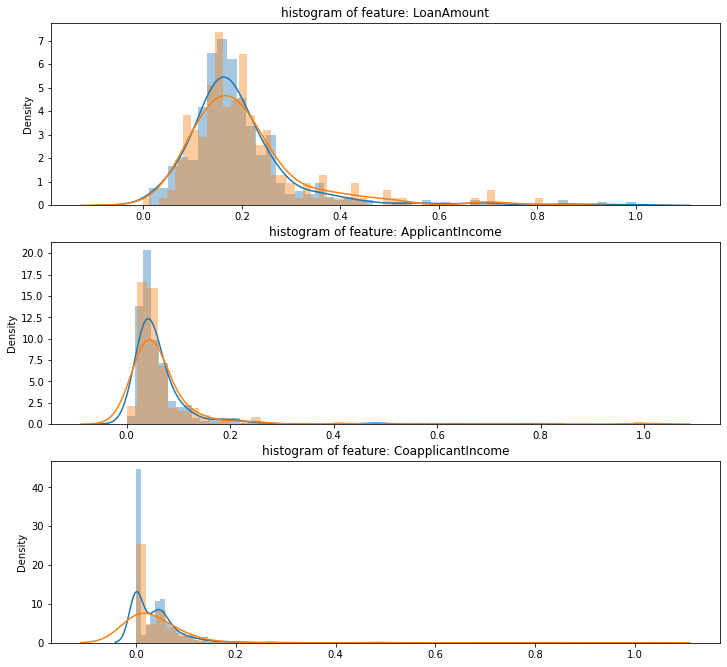

In [78]:
columns_to_display = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
display_distribution(train_df, columns_to_display)

### 7.3 Chuẩn hóa cho tập validation

`TODO 7`: Sử dụng tham số min max của tập train để chuẩn hóa cho 4 cột `Loan_Amount_Term`, `LoanAmount`, `ApplicantIncome`, `CoapplicantIncome` của tập validation

In [79]:
column_names_to_normalize =  ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

val_df = scaling(val_df, min_max_scaler, column_names_to_normalize, mode='val')

In [80]:
val_df['LoanAmount'].mean()

0.1841861725919897

In [81]:
# TEST CODE
# Lập trình tại đây
columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
for col in columns:
  print("Giá trị trung bình của cột {} mới là : {}".format(col, val_df[col].mean()))

Giá trị trung bình của cột LoanAmount mới là : 0.1841861725919897
Giá trị trung bình của cột ApplicantIncome mới là : 0.05758317198566323
Giá trị trung bình của cột CoapplicantIncome mới là : 0.037669562403718757
Giá trị trung bình của cột Loan_Amount_Term mới là : 0.7062577144321013


**Kết quả mong đợi:**

```
Giá trị trung bình của cột LoanAmount mới là : 0.18418617259198974
Giá trị trung bình của cột ApplicantIncome mới là : 0.05758317198566323
Giá trị trung bình của cột CoapplicantIncome mới là : 0.037669562403718757
Giá trị trung bình của cột Loan_Amount_Term mới là : 0.7062577144321035
```

## 8. Số hóa các đặc trưng loại

Danh sách các cột đặc trưng loại.
- Gender
- Married
- Dependents
- Education
- Self_Employed
- Property_Area
- Loan_Status

### 8.1 Định nghĩa danh sách chuyển đặc trưng loại thành số tương ứng

Ta định nghĩa một từ điển lồng trong từ điển định nghĩa những giá trị tương ứng khi ta số hóa.

Ví dụ:  
- Cột `Gender` các giá trị có thể là `Male` và `Female` ta sẽ chuyển thành `0` và `1`
- Cột `Dependents` các giá trị có thể là chuỗi `'0'`, `'1'`, `'2'`, `'3+'` ta chuyển thành số `0`, `1`, `2`, `3`

In [82]:
categorical_to_number = {
    'Gender': {
        'Male': 0,
        'Female': 1, 
    },
    'Married': {
        'Yes': 1, 
        'No': 0
    },
    'Dependents': {
      '0': 0,
      '1': 1,
      '2': 2,
      '3+': 3,
    }, 
    'Education': {
        'Not Graduate': 0,
        'Graduate': 1,
    },
    'Self_Employed': {
        'No': 0,
        'Yes': 1, 
    },
    'Property_Area': {
        'Rural': 0,
        'Urban': 1, 
        'Semiurban': 2, 
    },
    'Loan_Status': {
        'N': 0,
        'Y': 1, 
    }

}

### 8.2 Tiến hành chuyển đặc trưng loại thành số trên tập train

Hàm để chuyển một cột từ loại thành số. Ví dụ với cột `Gender`

```train_df['Gender'].map( {'Male': 0, 'Female': 1} ).astype(int)```

Thay vì chạy hàm này trên từng cột thì ta `lặp` qua từng cột tập `train` và sử dụng hàm này

In [83]:
for col in categorical_to_number:
  alternative_values = categorical_to_number[col]
  train_df[col] =  train_df[col].map( alternative_values ).astype(int)

Giờ ta có thể kiểm tra tất cả các cột đã được số hóa giá trị

In [84]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,0.070489,0.000000,0.198860,0.74359,1.0,1,1
1,LP001003,0,1,1,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,0,1,0,1,1,0.035250,0.000000,0.082489,0.74359,1.0,1,1
3,LP001006,0,1,0,0,0,0.030093,0.056592,0.160637,0.74359,1.0,1,1
4,LP001008,0,0,0,1,0,0.072356,0.000000,0.191027,0.74359,1.0,1,1


### 8.3 Tiến hành chuyển đặc trưng loại thành số trên tập validation

`TODO 8`: Số hóa các cột tương tự với tập validation, sử dụng từ điển `categorical_to_number` bên trên

In [86]:
for col in categorical_to_number:
  alternative_values = categorical_to_number[col]
  val_df[col] = val_df[col].map(alternative_values).astype(int)

In [87]:
# TEST CODE
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in columns:
  print("Cột {} có kiểu mới là: {}".format(col, val_df[col].dtype))

Cột Gender có kiểu mới là: int64
Cột Married có kiểu mới là: int64
Cột Dependents có kiểu mới là: int64
Cột Education có kiểu mới là: int64
Cột Self_Employed có kiểu mới là: int64
Cột Property_Area có kiểu mới là: int64
Cột Loan_Status có kiểu mới là: int64


**Kết quả mong đợi:**

```
Cột Gender có kiểu mới là: int64
Cột Married có kiểu mới là: int64
Cột Dependents có kiểu mới là: int64
Cột Education có kiểu mới là: int64
Cột Self_Employed có kiểu mới là: int64
Cột Property_Area có kiểu mới là: int64
Cột Loan_Status có kiểu mới là: int64
```

## 9. Xóa cột 

### 9.1 Trên tập train Xóa cột `Loan_ID`. Sử dụng cột `Loan_Status` làm nhãn

In [88]:
train_Y = train_df['Loan_Status']
train_X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)

### 9.2 Trên tập validation Xóa cột `Loan_ID`. Sử dụng cột `Loan_Status` làm nhãn

In [89]:
val_Y = val_df['Loan_Status']
val_X = val_df.drop(['Loan_ID', 'Loan_Status'], axis=1)

## 10. Hiển thị ma trận tương quan

### 10.1 Hệ số tương quan

Hệ số tương quan là một chỉ số đo lường của một số loại tương quan, nghĩa là mối liên hệ thống kê giữa hai biến số. 

$$r =\frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$$


$\bar{x}$: Trung bình các giá trị $x$ \
$\bar{y}$: Trung bình các giá trị $y$ \
$r \in [-1, 1]$

Nhận xét:
- Khi mối tương quan này nhỏ hơn 0, đồng nghĩa mối quan hệ nghịch biến, khi biến này tăng thì biến kia giảm và ngược lại
- Khi mối tương quan này lớn hơn 0, đồng nghĩa mối quan hệ đồng biến, khi biến này tăng thì biến kia tăng và khi biến này giảm thì biến kia giảm
- Khi mối tương quan này bằng 0, 2 biến không có quan hệ với nhau.

### 10.2 Tương quan trên tập train

Hiển thị ma trận tương quan. Ma trận này hiển thị tất cả các giá trị tương quan giữa các cột dữ liệu với nhau. Trong thực tế, việc hiển thị này thường để xác định các cặp đặc trưng tương quan mạnh với nhau từ đó đưa ra quyết định `không sử dụng` một trong 2 đặc trưng để xây dựng mô hình.

In [90]:
train_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,-0.36,-0.17,0.05,0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.11,-0.02
Married,-0.36,1.00,0.33,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.01,0.09
Dependents,-0.17,0.33,1.00,-0.06,0.06,0.12,0.03,0.16,-0.10,-0.04,0.00,0.01
Education,0.05,-0.01,-0.06,1.00,0.01,0.14,0.06,0.17,0.08,0.07,0.07,0.09
Self_Employed,0.00,0.00,0.06,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.01,-0.00
ApplicantIncome,-0.06,0.05,0.12,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.02,-0.00
CoapplicantIncome,-0.08,0.08,0.03,0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,-0.02,-0.06
LoanAmount,-0.11,0.15,0.16,0.17,0.12,0.57,0.19,1.00,0.04,-0.00,-0.03,-0.04
Loan_Amount_Term,0.07,-0.10,-0.10,0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,0.02,-0.02
Credit_History,-0.01,0.01,-0.04,0.07,-0.00,-0.02,0.01,-0.00,0.00,1.00,0.03,0.54


### Phân tích:
  - Với tập train có sự tương quan giữa số lượng vay (LoanAmount) và thu nhập người vay (ApplicantIncome). Tuy nhiên sự tương quan này chưa quá lớn để bỏ một trong 2 đặc trưng.
  - Lịch sử vay (Credit_History) có sự tương quan tới khả năng được vay. Điều này hoàn toàn hợp lý

### Quyết định
  - Giữ nguyên tất cả những đặc trưng cho việc training

### 10.3 Tương quan trên tập Validation

Bạn hay tự đưa ra quan sát cá nhân của mình. (Đây không phải bài tập)

In [91]:
val_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,-0.27,-0.09,0.03,-0.07,-0.06,-0.08,-0.07,0.06,-0.03,0.07,-0.06
Married,-0.27,1.00,0.36,-0.05,0.03,0.05,0.03,0.18,0.04,0.04,-0.02,0.10
Dependents,-0.09,0.36,1.00,-0.13,-0.02,0.14,-0.05,0.13,-0.05,-0.05,0.02,0.03
Education,0.03,-0.05,-0.13,1.00,0.01,0.14,0.06,0.16,-0.06,0.04,-0.02,0.05
Self_Employed,-0.07,0.03,-0.02,0.01,1.00,0.07,-0.03,0.08,-0.03,0.10,-0.12,0.13
ApplicantIncome,-0.06,0.05,0.14,0.14,0.07,1.00,-0.11,0.49,0.02,0.09,0.01,0.10
CoapplicantIncome,-0.08,0.03,-0.05,0.06,-0.03,-0.11,1.00,0.15,-0.01,-0.06,-0.08,-0.01
LoanAmount,-0.07,0.18,0.13,0.16,0.08,0.49,0.15,1.00,0.10,-0.01,-0.03,-0.01
Loan_Amount_Term,0.06,0.04,-0.05,-0.06,-0.03,0.02,-0.01,0.10,1.00,-0.05,-0.01,-0.09
Credit_History,-0.03,0.04,-0.05,0.04,0.10,0.09,-0.06,-0.01,-0.05,1.00,-0.00,0.83


## 11. Tiến hành xây dựng mô hình Logistic bằng Tensorflow

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

```TODO 9```: Xây dựng mô hình Logistic

In [93]:
def create_model(input_shape):
  """
  Đầu vào:
    - input_shape: 
      - Dạng: Tuple. 
      - Ví dụ: (20, )
  Đầu ra:
    - model
      - Sequential model
  """
  # Lập trình tại đây
  # Tạo sequential model 
  model = Sequential()

  # Thêm lớp Dense với đầu ra là 1 kèm theo activation là sigmoid. chiều đầu vào là tham số input_shape
  model.add(Dense(1, activation='sigmoid', input_shape=input_shape))
  

  # Trả về model
  return model


In [94]:
# TEST CODE
test_input_shape = (train_X.shape[1], )
test_model = create_model(input_shape=test_input_shape)
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


**Kết quả mong đợi:**

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_2 (Dense)              (None, 1)                 12        
=================================================================
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
```

In [95]:
# Khởi tạo mô hình
learning_rate = 0.01
input_shape = (train_X.shape[1], )
model = create_model(input_shape=input_shape)

In [96]:
# Tạo optimizer sgd với tốc độ học là tham số learning_rate của hàm
sgd = SGD(learning_rate)

model.compile(sgd, loss='binary_crossentropy', metrics=['acc'])

In [97]:
model.fit(train_X, train_Y, epochs=200, verbose=2, validation_data=(val_X, val_Y))

Epoch 1/200
20/20 - 1s - loss: 0.6980 - acc: 0.6026 - val_loss: 0.6300 - val_acc: 0.6594 - 799ms/epoch - 40ms/step
Epoch 2/200
20/20 - 0s - loss: 0.6896 - acc: 0.6091 - val_loss: 0.6205 - val_acc: 0.6703 - 72ms/epoch - 4ms/step
Epoch 3/200
20/20 - 0s - loss: 0.6838 - acc: 0.6140 - val_loss: 0.6112 - val_acc: 0.6757 - 66ms/epoch - 3ms/step
Epoch 4/200
20/20 - 0s - loss: 0.6784 - acc: 0.6140 - val_loss: 0.6027 - val_acc: 0.6785 - 67ms/epoch - 3ms/step
Epoch 5/200
20/20 - 0s - loss: 0.6730 - acc: 0.6156 - val_loss: 0.5950 - val_acc: 0.6785 - 63ms/epoch - 3ms/step
Epoch 6/200
20/20 - 0s - loss: 0.6685 - acc: 0.6221 - val_loss: 0.5881 - val_acc: 0.6894 - 81ms/epoch - 4ms/step
Epoch 7/200
20/20 - 0s - loss: 0.6642 - acc: 0.6401 - val_loss: 0.5819 - val_acc: 0.7166 - 65ms/epoch - 3ms/step
Epoch 8/200
20/20 - 0s - loss: 0.6598 - acc: 0.6564 - val_loss: 0.5743 - val_acc: 0.7493 - 65ms/epoch - 3ms/step
Epoch 9/200
20/20 - 0s - loss: 0.6560 - acc: 0.6678 - val_loss: 0.5679 - val_acc: 0.7520 - 73m

**Kết quả mong đợi:** Kết quả này là tương đối tuy nhiên mong muốn mô hình sẽ có độ chính xác trên tập validation hơn 90%

```
Epoch 197/200
20/20 - 0s - loss: 0.5038 - acc: 0.8046 - val_loss: 0.3587 - val_acc: 0.9455
Epoch 198/200
20/20 - 0s - loss: 0.5035 - acc: 0.8062 - val_loss: 0.3593 - val_acc: 0.9455
Epoch 199/200
20/20 - 0s - loss: 0.5033 - acc: 0.8078 - val_loss: 0.3581 - val_acc: 0.9455
Epoch 200/200
20/20 - 0s - loss: 0.5031 - acc: 0.8078 - val_loss: 0.3573 - val_acc: 0.9455
```

### 12. Đánh giá chất lượng mô hình - Nâng cao - tham khảo thêm

Các chỉ số này sẽ được giảng dạy chi tiết trong các bài học tiếp theo. Mục đích của phần này cho chúng ta thấy vấn đề mất cân bằng dữ liệu.

Đọc thêm về các chỉ số này [tại đây](https://classroom.google.com/c/Mzg3NDIzMjExOTQ5/m/NDMzNjkzMzAyNjA2/details)

### 12.1 Tính Precision, Recall và F1 Score 
Thực hiện trên cả nhãn Positive và Negative

In [98]:
y_pred = (model.predict(val_X) >= 0.5).astype(int)

target_names = ['NO', 'YES']

from sklearn.metrics import classification_report
print(classification_report(
    val_Y, y_pred, target_names=target_names
))

y_pred.shape

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          NO       0.98      0.75      0.85        77
         YES       0.94      1.00      0.97       290

    accuracy                           0.95       367
   macro avg       0.96      0.87      0.91       367
weighted avg       0.95      0.95      0.94       367



(367, 1)

In [99]:
from sklearn.metrics import confusion_matrix
TN, FP, FN, TP = confusion_matrix(val_Y, y_pred).ravel()

In [100]:
TP, FP, TN, FN

(289, 19, 58, 1)

In [101]:
# Positive Precision

TP / (TP + FP)

0.9383116883116883

In [102]:
# Positive Recall

TP / (TP + FN)

0.996551724137931

In [103]:
# Negative Precision

TN / (TN + FN)

0.9830508474576272

In [104]:
# Negative Recall

TN / (TN + FP)

0.7532467532467533

Nhận thấy Negative Recall tương đối thấp vì có sự mất cân bằng của dự liệu giữa nhãn `YES` và `NO`

In [105]:
train_df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Cách giải quyết đơn giản nhất hiện tượng này là oversampling hoặc undersampling. Xem thêm [tại đây](https://github.com/scikit-learn-contrib/imbalanced-learn).

-------------------- Kết thúc --------------------

<img src='https://storage.googleapis.com/protonx-cloud-storage/icons/1103-confetti-outline.gif' width=200>